# **CNN for Fashion-MNIST Classification in TensorFlow (Google Colab)**

The Fashion MNIST dataset is a lightweight, built-in 10-class image dataset (60,000 training and 10,000 test examples) of 28×28 grayscale clothing items.
It’s a common beginner “Hello, World” for vision because it’s small and easy to load (60K+10K = 70K images total
) and more challenging than digit MNIST. For example, official TensorFlow docs note Fashion-MNIST has 10 categories (T-shirt/top, Trouser, …, Ankle boot)
 and is “a slightly more challenging problem than regular MNIST” but still a good testbed for deep models. We’ll use TensorFlow/Keras on Colab (free GPU) to build a simple CNN, keep it small (few layers, moderate filters) so it trains quickly, yet achieves high accuracy. In fact, one TensorFlow blog shows a similar CNN reaching over 90% test accuracy with minimal tuning

**Data Loading and Preprocessing**

We load Fashion-MNIST directly from `tf.keras.datasets` for simplicity. It comes as `(x_train,y_train), (x_test,y_test)` where `x_*` are 28×28 uint8 images (0–255) and `y_*` are integer labels 0–9. Example classes include “T-shirt/top” (0) through “Ankle boot” (9). For illustration, one sample image from the dataset is shown below: Figure: Example from the Fashion-MNIST dataset – a 28×28 grayscale image (here a T-shirt). The full dataset contains 70,000 such images across 10 clothing categories. Each pixel value is 0–255. We normalize pixels to [0,1] by dividing by 255.0 (so training and test both scaled identically). Also, CNN layers expect a channel dimension, so we reshape to `(batch,28,28,1)`. Finally, we reserve a bit of training data for validation (e.g. `validation_split` in `model.fit`). In code:

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize to [0,1] and reshape to (28,28,1)
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0
x_train = np.expand_dims(x_train, -1)  # shape now (60000,28,28,1)
x_test  = np.expand_dims(x_test, -1)   # shape now (10000,28,28,1)

print("Dataset shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset shapes: (60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


We use astype`('float32')` then `/255.0` to convert to float in [0,1], as recommended.
The reshape adds the “channel” dimension for Keras (`Conv2D` expects shape `(height,width,channels)`).

**CNN Model Architecture**
We define a small CNN using Keras’s Sequential API. A typical beginner CNN has one or two convolution+pooling blocks, then one or two dense layers. For example, a “baseline” CNN can be:

Conv2D(32, 3×3) + ReLU + MaxPooling2D – detects low-level features.

Conv2D(64, 3×3) + ReLU + MaxPooling2D – builds higher-level features.

Flatten – convert 2D feature maps to 1D.

Dense(64, ReLU) – a small fully-connected layer.

Dense(10, softmax) – output layer for 10 classes.

This architecture is quite standard in tutorials. (One published example uses 32→64 filters with 3×3 kernels and pooling, achieving ~90% accuracy.) We use modest filter sizes so training is fast on Colab’s free GPU. Here is a clean implementation with comments:

In [2]:
model = models.Sequential([
    # First conv layer: 32 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),           # 2x2 max pooling

    # Second conv layer: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),                     # flatten 2D to 1D
    layers.Dense(64, activation='relu'),  # fully-connected layer
    layers.Dense(10, activation='softmax')# 10-class output
])

model.summary()  # show architecture and parameter count

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Key points: each Conv2D with ReLU learns image features; MaxPooling2D downsamples to reduce size and computation; Flatten converts to 1D; final Dense uses softmax to output class probabilities. This simple CNN is often enough for Fashion-MNIST

**Compile and Train**

We compile with a suitable optimizer and loss. For multi-class classification, sparse categorical crossentropy is a good choice (labels are integer 0–9). The official guide uses SparseCategoricalCrossentropy(from_logits=True) when last layer has no softmax
tensorflow.org
, but since we included softmax we use the simpler form. Adam optimizer usually works well for beginners. We then train with a small number of epochs (e.g. 5–10). Using validation_split=0.1 reserves 10% of training for validation. Example training code:

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)  # keep 10% of train as validation

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.7476 - loss: 0.7333 - val_accuracy: 0.8692 - val_loss: 0.3627
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.8752 - loss: 0.3510 - val_accuracy: 0.8752 - val_loss: 0.3343
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.8911 - loss: 0.3016 - val_accuracy: 0.8895 - val_loss: 0.3008
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - accuracy: 0.9018 - loss: 0.2671 - val_accuracy: 0.8965 - val_loss: 0.2785
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.9109 - loss: 0.2447 - val_accuracy: 0.9065 - val_loss: 0.2595
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 71s 54ms/step - accuracy: 0.9212 - loss: 0.2149 - val_accuracy: 0.9053 - val_loss: 0.2612
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 60ms/step - accuracy: 0.9239 - loss: 0.2087 - val_accuracy: 0.9095 - val_loss: 0.2475
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 73ms/step - accuracy: 0.9309 - loss: 0.1895 - 

During training, the model will display loss and accuracy for each epoch on both training and validation data. A well-chosen CNN typically reaches ~90% accuracy on Fashion-MNIST with very little tuning. (The cited blog example hits “over 90%” test accuracy.) Using only 10 epochs should suffice to see convergence.

**Evaluation and Results**

After training, we evaluate on the test set:

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:.2%}".format(test_acc))

313/313 - 2s - 8ms/step - accuracy: 0.9114 - loss: 0.2537
Test accuracy: 91.14%


This prints the final test accuracy. We expect on the order of 85–90% or higher, depending on exact architecture and epochs

We can also plot training history to inspect performance: for example, plotting loss and accuracy over epochs:

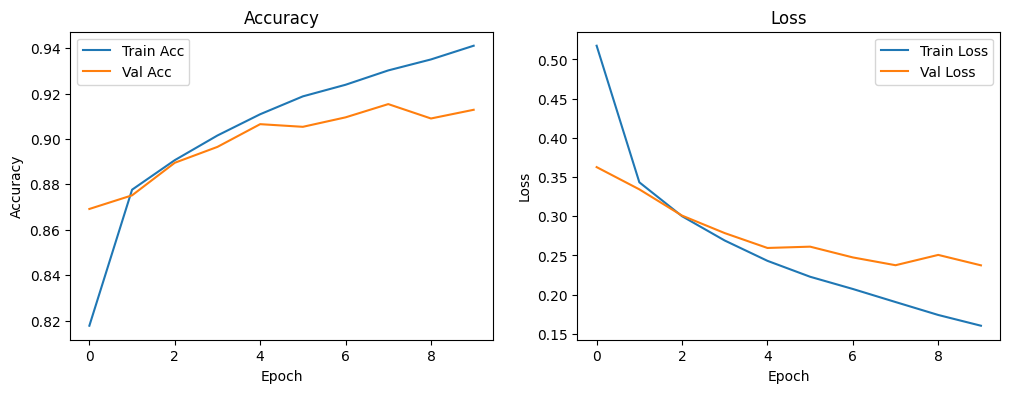

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy per epoch
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss per epoch
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend()
plt.show()

These curves help verify the model is learning (training accuracy rises, loss falls) and that validation follows (no severe overfitting). For a simple CNN on Fashion-MNIST, accuracy curves typically plateau near epoch 5–10.

To analyze errors, we can compute a confusion matrix. This shows how often each class is predicted versus the true class. For example:

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


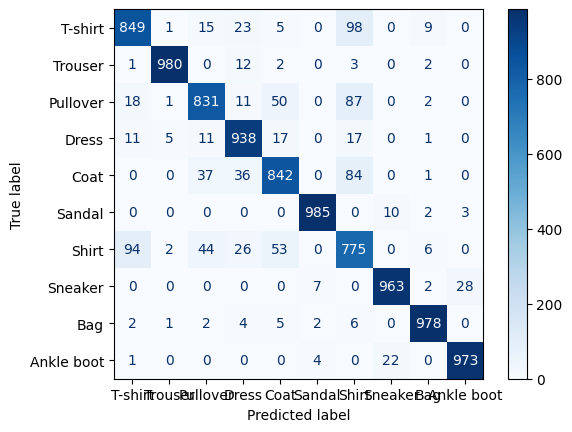

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=[
    'T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

This plot highlights which classes the model confuses. (All of these steps – accuracy, loss curves, confusion matrix – are standard ways to evaluate classifier performance. As noted in tutorials, test accuracy a bit below training accuracy indicates mild overfitting

**Predictions and Visualization**

Finally, we can look at some example predictions. We take a few test images and show the model’s predicted label vs the true label. For instance:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


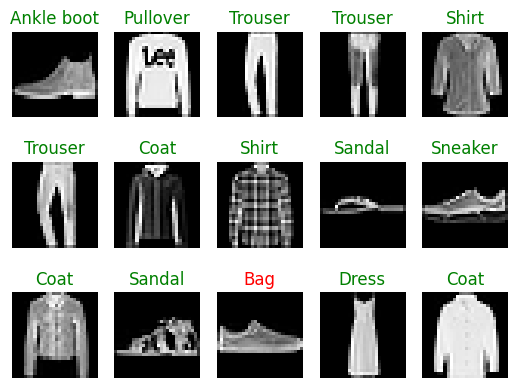

In [7]:
import numpy as np

# Class names (must match label encoding)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Predict probabilities for first 15 test images
probs = model.predict(x_test[:15])
predicted_labels = np.argmax(probs, axis=1)
true_labels = y_test[:15]

# Display results
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"{class_names[predicted_labels[i]]}", color=color)
    plt.axis('off')
plt.show()

*Figure: Sample test images with predicted labels (green = correct, red = incorrect). This visualization (from a TensorFlow tutorial) highlights correct.*

 In the example above, correct predictions are shown in green and mistakes in red. This kind of visual check is helpful to qualitatively assess model behavior. In practice, you’d see mostly green if accuracy is high (as in the TensorFlow example image above where only a few labels are red).

In [8]:
# Save the trained model to a file
model.save('fashion_mnist_cnn.h5')

print("Model saved successfully as 'fashion_mnist_cnn.h5'")

Model saved successfully as 'fashion_mnist_cnn.h5'


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!cp fashion_mnist_cnn.h5 /content/drive/MyDrive/


### ✅ Model Export & Download

The trained CNN model has been saved and exported as:

**Filename:** `fashion_mnist_cnn.h5`  
**Download Link:** [Click here to access the saved model in Google Drive](https://drive.google.com/file/d/1s26un5x9zXhe_GttXUSCUB-ayBOBTP8H/view?usp=sharing)

You can use this file to:
- Load the trained model later for inference or fine-tuning.
- Share the pretrained model as part of the internship deliverables.
- Avoid retraining when testing.

To load it back in another Colab notebook:

```python
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/fashion_mnist_cnn.h5')
